In [84]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [85]:
# Drop Alpha Channel

def read_transparent_png(filename):
    image_4channel = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    alpha_channel = image_4channel[:,:,3]
    rgb_channels = image_4channel[:,:,:3]

    # White Background Image
    white_background_image = np.ones_like(rgb_channels, dtype=np.uint8) * 255

    # Alpha factor
    alpha_factor = alpha_channel[:,:,np.newaxis].astype(np.float32) / 255.0
    alpha_factor = np.concatenate((alpha_factor,alpha_factor,alpha_factor), axis=2)

    # Transparent Image Rendered on White Background
    base = rgb_channels.astype(np.float32) * alpha_factor
    white = white_background_image.astype(np.float32) * (1 - alpha_factor)
    final_image = base + white
    return final_image.astype(np.uint8)

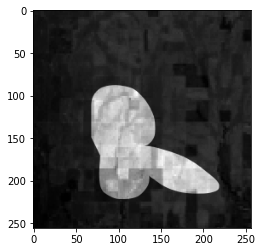

In [86]:
DATADIR = 'D:/Documenten/Projects/pp maps/training'
CATEGORIES = ['no pp', 'pp']

# Reduce input size

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = read_transparent_png(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGRA2GRAY)
        plt.imshow(img_array, cmap='gray')
        break
    break

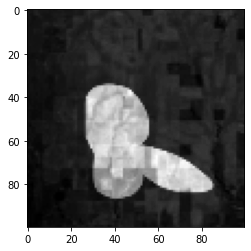

In [88]:
IMG_SIZE = 70

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [89]:
training_data = []

# Read and load all image files

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        n = 0
        for img in os.listdir(path):
            n += 1
            if n % 5000 == 0: print(n)
            try:
                img_array = read_transparent_png(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGRA2GRAY)
                new_array = np.array(cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)

create_training_data()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000


In [90]:
print(len(training_data))

53771


In [91]:
import random

# Shuffle the data

random.shuffle(training_data)

In [92]:
for sa in training_data[0:10]:
    print(sa[1])

1
1
1
0
1
1
1
1
0
0


In [93]:
X = []
Y = []

In [94]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
# Create separate lists for the images and the training data
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # TensorFlow wants you to do this
Y = np.array(Y)

In [95]:
import pickle
import numpy as np

# Pickle the data so you can just start from here the next time and you don't need to run the previous code again

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close

pickle_out = open('Y.pickle', 'wb')
pickle.dump(Y, pickle_out)
pickle_out.close()

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
import pickle
import numpy as np

# Load your previously obtained result so you don't have to run all the previous code again

X = pickle.load(open('X.pickle', 'rb'))
Y = pickle.load(open('Y.pickle', 'rb'))

X = X/255.0
X = np.array(X)
Y = np.array(Y)

In [6]:
## Create and train the model. Shape has been derrived from the function at the end of this page

model = Sequential()
model.add(Conv2D(160, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(160, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(100, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(120, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(80))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, batch_size=100, epochs = 10, validation_split=0.1)

Epoch 1/10
484/484 [==============================] - 174s 353ms/step - loss: 0.6869 - accuracy: 0.5286 - val_loss: 0.5795 - val_accuracy: 0.6978
Epoch 2/10
484/484 [==============================] - 163s 337ms/step - loss: 0.5652 - accuracy: 0.7052 - val_loss: 0.5045 - val_accuracy: 0.7547
Epoch 3/10
484/484 [==============================] - 164s 339ms/step - loss: 0.4878 - accuracy: 0.7630 - val_loss: 0.4864 - val_accuracy: 0.7637
Epoch 4/10
484/484 [==============================] - 174s 359ms/step - loss: 0.4400 - accuracy: 0.7886 - val_loss: 0.4626 - val_accuracy: 0.7817
Epoch 5/10
484/484 [==============================] - 170s 350ms/step - loss: 0.4013 - accuracy: 0.8177 - val_loss: 0.4452 - val_accuracy: 0.7932
Epoch 6/10
484/484 [==============================] - 178s 367ms/step - loss: 0.3680 - accuracy: 0.8330 - val_loss: 0.4637 - val_accuracy: 0.7871
Epoch 7/10
484/484 [==============================] - 170s 351ms/step - loss: 0.3318 - accuracy: 0.8503 - val_loss: 0.4388 -

In [ ]:
import tensorflowjs as tfjs

# Export the model to use it in a JavaScript Application

tfjs.converters.save_keras_model(model, 'model')
model.save('model')


In [7]:
import tensorflow as tf
model = tf.keras.models.load_model('model')

In [ ]:
###############################################################################
# Everything below was used to run the model on sample tiles I had downloaded #
###############################################################################

In [1]:
import os

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles


In [2]:
tiles = getListOfFiles('D:/Documenten/Projects/pp maps/tiles')
print(len(tiles))

115098


In [3]:
import cv2
import imutils
       
def process(image):
    img_array = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    alpha = cv2.split(img_array)[3]
    if alpha.min() < 250: return [None]
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGRA2GRAY)
    return img_array

def sliding_window(image, step=10, size=(70,70)):
    # slide a window across the image
    for y in range(0, image.shape[0] - size[1], step):
        for x in range(0, image.shape[1] - size[0], step):
            # yield the current window
            yield (x, y, image[y:y + size[1], x:x + size[0]])
    
def image_pyramid(image, scale=1.5, minSize=(70, 70)):
    # yield the original image
    yield image
    # keep looping over the image pyramid
    while True:
        # compute the dimensions of the next image in the pyramid
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image

In [4]:
import numpy as np

IMG_SIZE = 70
def prepare(img_array):
    images = []
    paths = []
    for img in img_array:
        img_array = cv2.imread(img, cv2.IMREAD_UNCHANGED)
        alpha = cv2.split(img_array)[3]
        if alpha.min() < 250: continue
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGRA2GRAY)
        new_array = np.array(cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)))
        images.append(new_array)
        paths.append(img)
    return (images, paths)


(images, paths) = prepare(tiles)

print(np.array(images[:3]).reshape(-1, IMG_SIZE, IMG_SIZE, 1))
# prediction = np.array(model.predict(np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0))
print('done classifying')

[[[[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [46]
   [54]
   [53]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [61]
   [54]
   [56]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [61]
   [60]
   [55]]]


 [[[ 0]
   [ 0]
   [ 0]
   ...
   [57]
   [60]
   [57]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [49]
   [59]
   [58]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [52]
   [54]
   [57]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [60]
   [40]
   [39]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [55]
   [36]
   [34]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [39]
   [44]
   [41]]]


 [[[ 0]
   [ 0]
   [ 0]
   ...
   [41]
   [40]
   [40]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [40]
   [36]
   [42]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [42]
   [45]
   [40]]

  ...

  [[ 0]
   [ 0]
   [69]
   ...
   [70]
   [67]
   [86]]

  [[ 0]
   [ 0]
   [73]
   ...
   [63]
   [65]
   [80]]

  [[ 0

In [6]:
from shutil import copyfile

newPaths = []

n = 0
for num, pred in enumerate(prediction):
    if pred[0] > 0.95:
        n += 1
        newPaths.append(paths[num])
        copyfile(paths[num], 'D:/Documenten/Projects/pp maps/pp tiles/{}.png'.format(n))

print(len(newPaths))

596


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import time

n = 0
for tile in newPaths:
    n += 1
    if n % 1000 == 0: print(n)
    # start = time.time()
    
    tileBW = process(tile)
    if None in tileBW: continue
    tileCO = cv2.imread(tile, cv2.IMREAD_COLOR)
    
    images = []
    locs = []
    
    W = tileBW.shape[1]
    
    # loop over the image pyramid
    for image in image_pyramid(tileBW, 1.5):
        
        # determine the scale factor between the *original* image dimensions and the *current* layer of the pyramid
        scale = W / float(image.shape[1])
    
        # for each layer of the image pyramid, loop over the sliding window locations
        for (x, y, slide_img) in sliding_window(image, 20):
            
            # scale the (x, y)-coordinates of the ROI with respect to the *original* image dimensions
            x = int(x * scale)
            y = int(y * scale)
            w = int(70 * scale)
            h = int(70 * scale)
        
            # take the ROI and preprocess it so we can later classify the region using Keras/TensorFlow
            # update our list of ROIs and associated coordinates
            images.append(np.array(cv2.resize(slide_img, (IMG_SIZE, IMG_SIZE))))
            locs.append((x, y, x + w, y + h))
            # plt.imshow(np.array(cv2.resize(slide_img, (IMG_SIZE, IMG_SIZE))), cmap='gray')
            # plt.show()

    images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
    preds = model.predict(images)
    
    # loop over the predictions
    maxProb = 0
    maxImage = [None]
    maxBox = None

    for (i, p) in enumerate(preds):

        # grab the prediction information for the current ROI
        prob = p[0]
        # filter out weak detections by ensuring the predicted probability
        # is greater than the minimum probability
        if prob > 0.95 and maxProb < prob:
            maxProb = prob
            maxBox = locs[i]
            maxImage = images[i]
            
    if None not in maxImage:
        tileWithRectangle = cv2.rectangle(tileCO, (maxBox[0], maxBox[1]), (maxBox[2], maxBox[3]), (255, 0, 0), 2)
        
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        location               = (10,250)
        fontScale              = 0.5
        fontColor              = (255,255,255)
        lineType               = 1
        
        cv2.putText(tileWithRectangle, str(maxProb), location, font, fontScale, fontColor, lineType)
        cv2.imwrite('D:/Documenten/Projects/pp maps/pp tiles 2/{0}.png'.format(n), tileWithRectangle)
        # plt.imshow(cv2.cvtColor(tileWithRectangle, cv2.COLOR_BGR2RGB))
        # plt.show()
        
    # end = time.time()

In [2]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
import pickle

LOG_DIR = f"{int(time.time())}"

tensorboard = TensorBoard(log_dir=LOG_DIR)

In [6]:
def build_model(hp):  # random search passes this hyperparameter() object 
    model = keras.models.Sequential()

    model.add(Conv2D(hp.Int('input_units',
                                min_value=60,
                                max_value=150,
                                step=10), (3, 3), input_shape=X.shape[1:]))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 8)):  # adding variation of layers.
        model.add(Conv2D(hp.Int(f'conv_{i}_units',
                                min_value=30,
                                max_value=150,
                                step=20), (3, 3)))
        model.add(Activation('relu'))

    model.add(Flatten()) 
    model.add(Dense(30))
    model.add(Activation('relu'))
                  
    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    return model

In [7]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=40,  # how many variations on model?
    executions_per_trial=1,  # how many trials per variation? (same model could perform differently)
    directory=LOG_DIR)

tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project 1608211509\untitled_project\oracle.json
Search space summary
Default search space size: 3
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 60, 'max_value': 150, 'step': 10, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
conv_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 150, 'step': 20, 'sampling': None}


In [8]:
tuner.search(x=X,
             y=Y,
             epochs=10,
             batch_size=100,
             callbacks=[tensorboard],
             validation_split=0.1)

tuner.results_summary()

Trial 40 Complete [00h 03m 34s]
val_accuracy: 0.6975124478340149

Best val_accuracy So Far: 0.7074626684188843
Total elapsed time: 02h 29m 10s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1608211509\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 70
n_layers: 1
conv_0_units: 130
conv_1_units: 130
conv_2_units: 70
conv_3_units: 90
Score: 0.7074626684188843
Trial summary
Hyperparameters:
input_units: 60
n_layers: 1
conv_0_units: 110
conv_1_units: 50
conv_2_units: 50
conv_3_units: 50
Score: 0.7029850482940674
Trial summary
Hyperparameters:
input_units: 100
n_layers: 3
conv_0_units: 110
conv_1_units: 90
conv_2_units: 90
conv_3_units: 150
Score: 0.7019900679588318
Trial summary
Hyperparameters:
input_units: 120
n_layers: 2
conv_0_units: 110
conv_1_units: 70
conv_2_units: 130
conv_3_units: 50
Score: 0.6975124478340149
Trial summary
Hyperparameters:
input_units: 60
n_layers: 3
conv_0_units:

In [9]:
with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)